##### Disclaimer:
I, Kasper Brun, have 5 courses which all require a group this semester. It is impossible for me to schedule and navigate 5 groups, and as such I have chosen to be alone for this course.
https://github.com/KaptajnBajer/ComSocSci2023

# 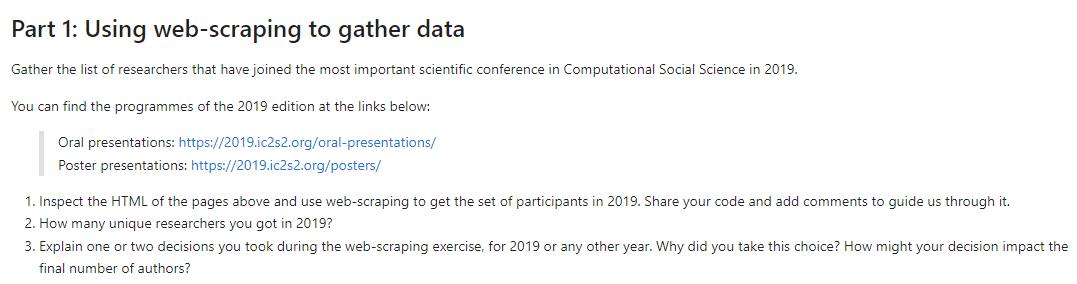

## Oral presentations

In [1]:
from bs4 import BeautifulSoup
import requests

# Starting with Oral presentations

LINK = "https://2019.ic2s2.org/oral-presentations/"
r = requests.get(LINK)
soup = BeautifulSoup(r.content)

#Via inspect element the participants are seen to be contained within <p></p> brackets in a specific class
table = soup.find("div",{"class":"col-md-8 page-content-wrap"})
table2 = table.find_all("p")

#First 3 elements are coding-related and thus filtered.
table2 = table2[3:]
table2[3]

<p><strong>1D Inequality and segregation</strong> – Thursday July 18, 11:00 – 12:30 <br/><em>Chair: Milena Tsvetkova</em><br/>11:00 – 11:15 – Eszter Bokanyi, Aniko Hannak. Simulating income distribution inequalities in ride-sharing services<br/>11:15 – 11:30 – Tarik Roukny, Benjamin Vandermarliere, Milan van den Heuvel, Koen Schoors. The wealth origins of income mobility<br/>11:30 – 11:45 – Yannick Léo, Eric Fleury, Carlos Sarraute, Márton Karsai. Socioeconomic inequalities and their consequences on network formation and purchase behaviour<br/>11:45 – 12:00 – Jaime Oliver, Marta Rivera-Alba, Diego Pérez, Antonio Molins, Edgar Morales Ramírez, Ricardo Buera Corchón. Elasticity divergence across socioeconomic levels: evidence from Mexico<br/>12:00 – 12:15 – Judith Kas, Rense Corten, Arnout van de Rijt. Digital discrimination – the role of reputation systems<br/>12:15 – 12:30 – Marc Keuschnigg. Urban Scaling and the Need of Microdata to Understand Social Laws</p>

Above text demonstrates an element of what is left. I cannot get BeautfifulSoup to split on "br/", though it would have been a good candidate. Therefore, I will convert each element into a string to access the relevant elements, split by "br/" and loop through each element. Each of the elements is a line from the website as demonstrated below.

In [2]:
#Convert to string and split on <br/>
T= str(table2).split("<br/>")
T[1:3]

['<em>Chair: Ziv Epstein</em>',
 '11:00 – 11:15 – Jieyu Ding, Qiusi Sun, Jingwen Zhang. Classifying and Understanding the Semantic Structures of Vaccine Misinformation on Twitter']

In [3]:
PARTICIPANTS = [] #Empty list for participants

#All relevant strings with presentations starts with a timestamp, i.e. first element is always a 1.
#I use this to filter.

for i in range(len(T)):
    for j in range(len(T[i])):
        if T[i][0] == "1":
            if T[i][j] == "." and T[i][j-1].isupper()==False:
                
                #Explanation: Loop through all the "lines of the website", if first element of the string is 
                #"1" continue. The first 17 elements of the string are the timestamp - these are discarded.
                #Loop through until the first full stop that is not following a capital letter (some participants
                #have their middle name shortened to "M." for example. Add to list and continue to next iteration.)
                
                PARTICIPANTS += T[i][16:j].split(", ")
                break

#Filtering the "no presentation"            
PARTICIPANTS = [x for x in PARTICIPANTS if not 'No presentation' in x]


On two seperate occasions a "No presentation (cancelled)." is followed by a name. It is assumed that these are irrelevant since the researcher did not participate. The script stops before their name is added to the list. The amount of unique researcher is decided by using set() and len().

In [4]:
print("Amount of unique researchers doing an oral presentaion in the IC²S² 2019 Program is", len(set(PARTICIPANTS)))

Amount of unique researchers doing an oral presentaion in the IC²S² 2019 Program is 521


This assumes that no researcher participated under different names, that cancelled presentations should be disregarded, and an "Ivan Smirnov" who has been "moved to 3D Text Analysis" should also be counted. It is unclear whether or not whether the "chairperson" should be counted as a researcher or not which I have chosen not to do. Below are the unique list of researchers.

## Posters

In [5]:
LINK = "https://2019.ic2s2.org/posters/"
r = requests.get(LINK)
soup = BeautifulSoup(r.content)

#Same class as last time
table = soup.find("div",{"class":"col-md-8 page-content-wrap"})

T2 = table.find_all("li")
print(f"Example of element in new list: \n{T2[2]}")

Example of element in new list: 
<li>Kiran Garimella, Gianmarco De Francisci Morales, Aristides Gionis and Michael Mathioudakis<span> </span><br/>
<strong>Political Discourse on Social Media: Echo Chambers, Gatekeepers, and the Price of Bipartisanship</strong></li>


Once more I will rely on pattern recognition. With BeatifulSoup I managed to extrapolate anything from 437 to 489 but there was always some odd case that proved problematic and in the end my original crude method gave a seemingly better result.

* Split on the span tag and only use anything before the split
* The first four symbols are a HTML tag (which could be removed with BeautifulSoup). Will be removed.
* Replacing potential " and "s with a comma allows for splitting more easily
* Some researchers are left over with a HTML tag at the end. Filter those by last element in the string being ">" and remove last 5 elements (the tag).
* Finally, left over lines with tags (i.e. HTML code containing a <-sign) are filtered

In [6]:
PARTICIPANTS2 = [] #list for participants

#Step 1-3
for i in range(len(T2)):
    a = str(T2[i]).split("<span>")[0][4:]
    a = a.replace(" and ",", ")
    a = a.split(", ")
    PARTICIPANTS2 += a

#Step 4    
for i in range(len(PARTICIPANTS2)):
    if PARTICIPANTS2[i][-1] == ">":
        PARTICIPANTS2[i] = PARTICIPANTS2[i][:-5]

#Step 5        
PARTICIPANTS2 = [x for x in PARTICIPANTS2 if '<' not in x]
#PARTICIPANTS2

This method is only feasible as the data size is still somewhat managable by eye, but if the data size was to increase, so would the potential for even more special cases and it becomes unmanagable. In fact, I know I lose one researcher ("Rens Wilderom" - could be added manually) since that particular line of entry uses the oxford comma as opposed to the rest of them, which my method does not account for. Also, one particular entry of "Christos Nicolaides,Luis Cueto-Felgueroso" is not split due to the comma not being followed by a space.  Deploying len() and set() to decide the amount of unique researcher. Once again it is assumed they are going the exact same name each entry.

In [9]:
print("Amount of unique researchers featured in posters:", len(set(PARTICIPANTS2)))

Amount of unique researchers featured in posters: 458


# 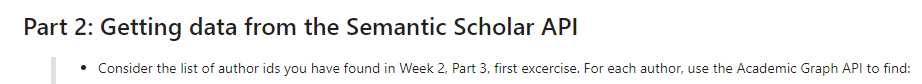

For this question additional webscraping of year 2020 and 2021 is required. Explanations are kept to a minium for brevity.

Specifically for 2020 it is a simple table, however, as it turns out BeautifulSoup grabs the JavaScript as opposed to
the HTML. Therefore, I have opted to use Excel - and while it is not pretty it is a solution. Simply copy-pasted all the participants and Excel and got it as one very long string. Transforming it by Python. Presentations marked with "tutorials" from the original table have been included.

In [10]:
#2020
PARTICIPANTS2020 = "Alex Pentland, Esteban Moro, Manuel Herranz, Vedran Sekara, Yan Leng, Diogo Pacheco, Kaicheng Yang, Pik-mai Hui, Dashun Wang, Lu Liu, Jana Diesner, Rezvaneh Rezapour, Shubhanshu Mishra, Kostas Stathoulopoulos, Zac Ioannidis, Andrea Baronchelli, Antonio Arechar, David Rand, Dean Eckles, Gordon Pennycook, Mohsen Mosleh, Ziv Epstein, Bryan Daniels, Chris Myers, David Krakauer, Edward Lee, Jessica Flack, Andras Voros, Christoph Stadtfeld, Hannah Muelder, Kieran Mepham, Marloes Maathuis, Michele Coscia, Christoph Kern, Denis Bonnay, Ruben Bach, Alvin Zhou, Kokil Jaidka, Yphtach Lelkes, Ashton Anderson, Isaac Waller, Alessandro Artoni, Francesco Pierri, Stefano Ceri, Alejandro Andrade, Anna Shvarts, Arthur Bakker, Dor Abrahamson, Lu Ou, Maria Bolsinova, Rosa Alberto, Alexandru Cernat, Florian Keusch, Alex Pentland, Dean Eckles, Martin Saveski, Yan Leng, Alexander Stewart, Antonio Arechar, David Rand, Joshua Plotkin, Marina Diakonova, Mohsen Mosleh, Carlos Fernandez, Foster Provost, Dean Eckles, Kiran Garimella, Ashton Anderson, Jon Kleinberg, Reid Mcilroy-young, Siddhartha Sen, Adam Hughes, David Lazer, Emma Remy, Sono Shah, Stefan Mccabe, William Hobbs, Alessandra Russo, Avelie Stuart, Elahe Naserian, Luke Dickens, Miriam Koschate, Florian Keusch, Frauke Kreuter, Georg-christoph Haas, Mark Trappmann, Sebastian Bahr, Elahe Naserian, Miriam Koschate-reis, Jan Overgoor, Johan Ugander, Pakapol Supaniratisai, Drew Dimmery, Yan Leng, Ceren Budak, Lia Bozarth, Alex Pentland, Dan Calacci, Ho-chun Chang, Soyun Ahn, Ana-andreea Stoica, Augustin Chaintreau, Jessy Han, Bedoor Alshebli, Gururaghav Raman, Jimmy Peng, Marcin Waniek, Talal Rahwan, Daniele Quercia, Luca Aiello, Milan Janosov, Chenhao Tan, Qin Lv, Shuo Zhang, Aaron Schein, David Blei, Dhanya Sridhar, Donald Green, James Moffet, Jeffrey Quinn, Keyon Vafa, Naseem Makiya, Victor Veitch, Adam Berinsky, Ali Jadbabaie, Amir Tohidi, Dean Eckles, Manon Revel, Alex Pentland, Felipe Montes, German Sanchez, Isabella Loaiza, Lina Ramos, Francesco Rampazzo, Katherine Pham, Leah Rosenzweig, Matthewo Mildenberger, Parrish Bergquist, Christos Nicolaides, Dean Eckles, Brandon Roy, Deb Roy, Emre Calisir, Marco Brambilla, David Rand, Erin Wamsley, Graelyn Humiston, Anton Boichenko, Nicholas Beauchamp, Tanya Berger-wolf, Bas Hofstra, Charles Gomez, Sebastian Munoz-najar, Alexander Waagen, Charles Martin, Tasi-ching Lu, Derek Weber, Lewis Mitchell, Lucia Falzon, Mehwish Nasim, Matthewhew Turner, Paul Smaldino, Jacob Staerk-ostergaard, Robin Engelhardt, Satyam Mukherjee, Brian Uzzi, Ryan Whalen, Sourav Medya, Daniel Romero, Edward Platt, Herminio Bodon, Kiran Garimella, Kirill Martynov, Robert West, Antonio Arechar, David Rand, Gord Pennycook, Jennifer Allen, Chris Riedl, Patrick Forber, Rory Smead, Zach Fulker, Gargiulo Floriana, Antonio Sirianni, Charles Gomez, Launy Schweiger, Kostas Stathoulopoulos, Zac Ioannidis, Alexandre Bovet, Anamika Shreeva, Anna Keuchenius, Chico Camargo, Irene Malvestio, Lea Brandt, Mikolaj Biesaga, Sabin Roman, Luca Verginer, Massimo Riccaboni, Pietro Panzarasa, Xiancheng Li, Feng Fu, Ho-chun Chang, Henner Gimpel, Manfred Schoch, Ricarda Schafer, Robert Laubacher, Doyne Farmer, Francois Lafond, Mariano Beguerisse-diaz, Penny Mealy, R. Rio-chanona, Haewoon Kwak, Hyeonho Song, Kunwoo Park, Meeyoung Cha, Hannes Ullrich, Michael Ribers, Alex Pentland, Dhaval Adjodah, Esteban Moro, Peter Kraft, Shi Chong, Yan Leng, Ashkan Kazemi, Jenna Sherman, Nat Gyenes, Scott Hale, Alfredo Morales, Dominic Saad, Mark Sutcliffe, Yaneer Bar-yam, Lulu Peng, Aparna Ananthasubramaniam, Daniel Romero, David Jurgens, Brian Aronson, Kaicheng Yang, Yy Ahn, Jodi Basner, Karen White, Wan-ying Chang, Akira Matsui, Andres Abeliuk, Aram Galstyan, Emilio Ferrara, Fred Morstatter, Bryan Moser, Ira Winder, Jeff Dieffenbach, Katherine Carroll, Keran Rong, Prakash Manandhar, Roland Filippi, Qing Ke, Soojong Kim, John Scott, Renzhe Yu, Dashun Wang, Yang Wang, Zhen Lei, Zhongyang He, Poong Oh, Soojong Kim, Ceren Budak, Danaja Maldeniya, Daniel Romero, Lionel Robert, Fosca Giannotti, Ioanna Miliou, Lorenzo Gabrielli, Luca Pappalardo, Vasiliki Voukelatou, Lewis Mitchell, Matthewhew Roughan, Tobin South, Janos Kertesz, Julia Koltai, Marton Karsai, Zoltan Kmetty, Amir Karami, Frank Webb, Anna Keuchenius, Justus Uitermark, Petter Tornberg, Karoly Bozsonyi, Zoltan Kmetty, Arun Frey, Christopher Barrie, Polina Revina, Jaeryoung Ka, Jeongwook Kim, Jiwan Jeong, Jiyoung Han, Junbum Lee, Meeyoung Cha, Shohei Doi, Shuhei Kurizaki, Takayuki Mizuno, Balaraju Battu, Dilara Kekulluoglu, Kami Vaniea, Walid Magdy, Nick Allum, Polina Mosolova, Yunus Tapan, Jeffrey Sternberg, Cameron Martel, Hannah Weinberg-wolf, Jeremy Dohmann, Steve Chang, Eevastiina Gjerstad, Lili Aunimo, Allen Moulton, Nazli Choucri, Stuart Madnick, Yifeng Wan, Nicholas Hagar, Adam Bear, Ben Tappin, David Rand, Giovanni Tonutti, Florian Cafiero, Jeremy Ward, Paul Guille-escuret, Michael Hoefer, Edwin Jonge, Gert Buiten, Haewoon Kwak, Ingmar Weber, Jisun An, Luis Luque, Christian Almenar, Esteban Moro, Iyad Rahwan, Manuel Cebrian, Matthew Groh, Micah Epstein, Niccolo Pescetelli, Nick Obradovich, Ziv Epstein, Bernie Hogan, Sian Brooke, Radim Hladik, Talia Kaufmann, Robert Mahari, Sandor Lera, Daekyung Lee, Heetae Kim, Sang Lee, Cody Buntain, Jacob Shapiro, Joshua Tucker, Meysam Alizadeh, Charles Howland, David Rothschild, Duncan Watts, Jennifer Allen, Tobias Konitzer, Cheng-jun Wang, Huimin Xu, Cuihua Shen, Jian Zhu, Seth Frey, Yixin Zhou, Florianne Verkroost, Alessandro Flammini, Filippo Menczer, Kaicheng Yang, Mohsen Sayyadiharikandeh, Onur Varol, Hunter Heidenreich, Jake Williams, Munif Mujib, Jana Diesner, Mihai Avram, Nikolaus Parulian, Shubhanshu Mishra, Tiffany Lu, Jana Diesner, Janina Sarol, Ly Dinh, Bill Thompson, Mathew Hardy, Peaks Krafft, Tom Griffiths, Bruno Lepri, Giulia Cencetti, Lorenzo Lucchini, Riccardo Gallotti, Bruno Lepri, Marco Nadai, Massimiliano Luca, Ceren Budak, Lia Bozarth, Christoph Kern, Frauke Kreuter, Masha Krupenkin, Ruben Bach, Armin Pournaki, Eckehard Olbrich, Felix Gaisbauer, Sven Banisch, Ivan Smirnov, Sofia Dokuka, David Jurgens, Eshwar Chandrasekharan, Jiajun Bao, Junjie Wu, Yiming Zhang, Cristian Vallejos, Miguel Guevara, Alex Pentland, Dean Eckles, Eaman Jahani, Ivan Garibay, Seyyedmilad Talebzadehhosseini, Joshua Introne, Niraj Sitaula, Fan Yang, Qian Liu, Abhi Dubey, Matthew Groh, Oceane Boulais, Ziv Epstein, Hang-hyun Jo, Jeehye Choi, Aparna Ananthasubramaniam, Lingfei Wu, Linzhuo Li, Agnes Horvat, Johannes Wachs, Nicholas Hagar, David Rand, Gordon Pennycook, Ziv Epstein, Eun Lee, Ovidia Stanoi, Peter Much, James Siderius, Tanujit Chakraborty, Henrik Olsson, Tamara Does, Vicky Yang, Azadeh Nematzadeh, Daniel Romero, Emilio Ferrara, Hao Peng, Qi Hao, Qiaozhu Mei, Wei Ai, Xuan Lu, Xuanzhe Liu, Yanbin Cao, Anna Cigarini, Josep Perello, Julian Vicens, Joshua Blumenstock, Ceren Budak, Daniel Chen, Ji Kim, Milena Tsvetkova, Alessandro Rizzo, Matthewhieu Nadini, Maurizio Porfiri, Jason Burton, Ulrike Hahn, Kenneth Joseph, Yuhao Du, Aaron Clauset, Allison Morgan, Daniel Larremore, Michael Hoefer, Mirta Galesic, Samuel Way, Alessandro Flammini, Diogo Pacheco, Filippo Menczer, Alice Jang, Jesse Shore, Ivan Smirnov, Amol Bhondekar, Rishemjit Kaur, Ritesh Kumar, Tian Yang, Yilang Peng, James Houghton, Junming Huang, Tao Jia, Xiaoyao Yu, Brian Uzzi, Mohammad Rasoolinejad, Juan Serrano, Orestis Papakyriakopoulos, Simon Hegelich, Alex Arenas, Javier Borge-holthoefer, Josep Perello, Mario Gutierrez-roig, Benjamin Jones, Dashun Wang, Kuansan Wang, Yian Yin, Yuxiao Dong, Baird Howland, Daniel Muise, David Rothschild, Duncan Watts, Homa Hosseinmardi, Markus Mobius, Christoph Stadtfeld, Benjamin Horne, Cody Buntain, Mauricio Gruppi, Milo Trujillo, Dean Eckles, Jeremy Yang, Paramveer Dhillon, Sinan Aral, David Rand, Gordon Pennycook, Jon Mcphetres, Xi Chen, Alexander Petersen, Albert Kao, Alex Rutherford, Iyad Rahwan, Niccolo Pescetelli, Sebastian Steffen, Ashwin Rajadesingan, Ceren Budak, Paul Resnick, Aaron Shaw, Benjamin Hill, Nathante Teblunthuis, Daniel Mcfarland, Hancheng Cao, Mengjie Cheng, Xiang Ren, Zhepeng Cen, Bedoor Alshebli, Kinga Makovi, Talal Rahwan, Douglas Guilbeault, Joshua Becker, Samuel Woolley, Ashton Anderson, Dan Goldstein, Duncan Watts, George Lifchits, Jake Hofman, Alex Pentland, Burcin Bozkaya, Hasan Boz, Mohsen Bahrami, Selim Balcisoy, Yoshihiko Suhara, Arkadiusz Wisniowski, Dilek Yildiz, Emilio Zagheni, Guy Abel, Ingmar Weber, Stijn Hoorens, Denis Helic, Florian Lemmerich, Markus Strohmaier, Tiago Santos, Alla Baranovsky, Eaman Jahani, Irene Pasquetto, Matthewhew Baum, Benjamin Ooghe-tabanou, Dominique Cardon, Guillaume Plique, Jean-philippe Cointet, P, Raj Chetty, Munmun Choudhury, Iyad Rahwan, Manuel Cebrian, Matthew Groh, Nick Obradovich, Ziv Epstein, Christoph Dann, Dustin Tingley, Emma Brunskill, Glenn Lopez, Joseph Williams, Justin Reich, Mike Yeomans, Rene Kizilcec, Selen Turkay, Neil Johnson, Nicholas Johnson, Nicolas Velazquez-hernandez, Rhys Leahy, Yonatan Lupu, Naoki Maejima, Shohei Usui, Susumu Nagayama, Takanori Nishida, Kazutoshi Sasahara, Michio Hosaka, Shimpei Okuda, Deb Roy, Doug Beeferman, Eric Chu, Nabeel Gillani, Bruno Lepri, Federico Battiston, Giulia Cencetti, Marton Karsai, Adina Nerghes, Anne Toonders, David Dekker, Ju-sung Lee, Florian Lemmerich, Ivan Smirnov, Markus Strohmaier, Satyam Mukherjee, Tarun Jain, Edwin Jonge, Jan Laan, Emilio Ferrara, Emily Chen, Fred Morstatter, Julie Jiang, Kristina Lerman, Anna Croley, David Rothschild, Duncan Watts, Homa Hosseinmardi, Ling Dong, Markus Mobius, Berk Deniz, Armin Pournaki, Eckehard Olbrich, Felix Gaisbauer, Sven Banisch, Maneet Singh, Rishemjit Kaur, S R, Ashton Anderson, Ian Anderson, Lucas Maystre, Mounia Lalmas, Rishabh Mehrotra, Andrea Parker, Brooke Welles, Elizabeth Stowell, Ryan Gallagheer, Florian Cafiero, Gerald Bronner, Laurent Cordonier, Dan Jurafsky, Julia Mendelsohn, Yulia Tsvetkov, Elise Jing, Simon Dedeo, Yy Ahn, Daniel Goldstein, Forough Poursabzi-sangdeh, Jake Hofman, Siddhartha Sen, Farshad Kooti, Kristen Altenburger, Laila Wahedi, Allison Koencke, Andrew Nam, Connor Toups, Dan Jurafsky, Emily Lake, Joe Nudell, John Rickford, Minnie Quartey, Sharad Goel, Zion Mengesha, Neil Johnson, Nicholas Johnson-restrepo, Nicolas Velasquez, Rhys Leahy, Yonatan Lupu, Ceren Budak, Christopher Quarles, Paul Resnick, Agnese Chiatti, Andrew Fitzgerald, Byron Reeves, Jihye Lee, Katie Roehrick, Mu-jung Cho, Nilam Ram, Thomas Robinson, Xiao Yang, Xiaoran Sun, Brian Uzzi, Cristian Vallejos, Joseph Hoover, Nour Kteily, Qiaozhu Mei, Wei Ai, Xuan Lu, Xuanzhe Liu, Yanbin Cao, Jana Diesner, Kanyao Han, Kehan Li, Pingjing Yang, Shubhanshu Mishra, Ana Brito, Diego Amancio, Filipi Silva, Ashwin Rajadesingan, David Jurgens, Ramaswami Mahalingam, Cristian Vallejos, Flavio Pinheiro, Joselina Davyt, Miguel Guevara, Aaron Halfaker, Benjamin Hill, Nathante Teblunthuis, Haewoon Kwak, Jisun An, Yy Ahn, Nicole Nisbett, Viktoria Spaiser, Henriette Cramer, Jean Garcia-gathright, Samuel Way, Kiran Sharma, Jeffery Schank, Sydney Wood, Martin Lukac, Jianyin Roachell, Andres Abeliuk, Emilio Ferrara, Kristina Lerman, Zhishen Huang, Cassidy Sugimoto, Dakota Murray, Lili Miao, Vincent Lariviere, Woo-sung Jung, Yy Ahn, Filippo Menczer, John Bollenbacher, Alessandro Flammini, Diogo Pacheco, Filippo Menczer, John Bollenbacher, Pik-mai Hui, Yy Ahn, Ben Rachunok, Roshi Nateghi, Akshay Aravamudan, Anna Koufakou, Chathika Gunaratne, Georgios Anagnostopoulos, Ivan Garibay, Xi Zhang, Hugo Contreras, Leo Ferres, Andrew Wang, Cynthia Habonimana, Rediet Abebe, Christopher Quarles, Lia Bozarth, Anri Suzuki, Fujio Toriumi, Andrew Halterman, Lisa Friedland, Nir Grinberg, Swati Goel, Hyeonho Song, Kunwoo Park, Meeyoung Cha, Daniel Romero, Maxim Sytch, Patrick Park, Christian Strippel, Joachim Trebbe, Laura Laugwitz, Martin Emmer, Sabina Hartnett, Sunje Paasch-colberg, Balazs Nagy, Dorottya Demszky, Julia Koltai, Martina Szabo, Orsolya Ring, Veronika Vincze, Zoltan Kmetty, Daniel Schroeder, Johannes Langguth, Konstantin Pogorelov, Petra Filkukova, Anahit Sargsyan, Flavio Pinheiro, Mona Zubaidi, Mark Whiting, Michael Bernstein, Phoebe Yao, Haewoon Kwak, Jisun An, Yy Ahn, Christoph Reuter, Isabella Czedik-eysenberg, Oliver Wieczorek, Adam Sawyer, George Barnett, Seth Frey, Taha Yasseri, Jean-michel Dalle, Jose Halloy, Theophile Carniel, Brett Bourbon, Renita Murimi, Faiz Ahamad, Lana Bilalova, Subhayan Mukerjee, Alfredo Morales, Egemen Sert, Oral Okan, Oliver Wieczorek, Ahmet Kurnaz, Scott Hale, Johannes Wachs, Julia Koltai, Karoly Takacs, Laszlo Lorincz, Jana Diesner, Lan Jiang, Ly Dinh, Rezvaneh Rezapour, Haylee Ham, Milena Tsvetkova, Oana Vuculescu, Rinat Sergeev, Sebastian Muller, Abeer Aldayel, Walid Magdy, Brian Uzzi, Dashun Wang, Nima Dehmamy, Suman Maity, Victoria Medvec, Yang Wang, Muyang Li, Zhifan Luo, Arun Sen, Kaustav Basu, Alexander Mantzaris, Amirarsalan Rajabi, Cameron Taylor, Ivan Garibay, Alexander Loser, Betty Aken, Christian Strippel, Joachim Trebbe, Laura Laugwitz, Martin Emmer, Sunje Paasch-colberg, Brian Uzzi, Mohammad Rasoolinejad, Sourav Medya, Katherine Haenschen, Ali Tafti, Hyejin Youn, Mohamad Hosseinioun, Bari Bendell, Dmitry Zinoviev, Pelin Bicen, Jessica Santana, Sagar Kumar, Marc Rauckhorst, Nupur Baghel, Roshan Santhosh, Shubham Annadate, Shweta Chopra, Yi-nung Huang, Aniko Hannak, Kenneth Joseph, Stefania Ionescu, Luca Verginer, Massimo Riccaboni, Pietro Panzarasa, Xiancheng Li, Yifan Qian, Alex Pentland, Alia Braley, Dan Calacci, Dhaval Adjodah, Filippo Simini, Flavia Luca, Robert Eyre, Ismail Uluturk, Onur Varol, Alex Pentland, Ding Lyu, Lin Wang, Xiaofan Wang, Evgenia Dolgova, Pursey Heugens, Gwilym Pryce, Mohammed Aleinzi, Nathan Hughes, Roland Toth, Tatiana Trifonova, David Bartl, Jaroslav Ramik, Jiri Mazurek, Radomir Perzina, Adam Richards, Andrew Ledbetter, Jie Zhuang, Qinghua Yang, Andreas Witt, Diana Steffen, Jana Diesner, Jutta Bopp, Norman Fiedler, Rezvaneh Rezapour, Renata Nemeth, Zoltan Kmetty, Aaron Clauset, Daniel Larremore, Sam Zhang, Dakota Murray, Jisung Yoon, Rodrigo Costas, Stasa Milojevic, Woo-sung Jung, Yy Ahn, Hendrik Schawe, Laura Hernandez, Christopher Danforth, Joshua Minot, Michael Arnold, Peter Dodds, Thayer Alshaabi, Ulrike Hahn, Kristina Lerman, Filippo Menczer, Daniel Putman, Esteban Moro, Inaki Ucar, Marco Fiore, Marco Gramaglia, Zbigniew Smoreda, Amir Goldberg, Paul Vicinanza, Sameer Srivastava, Filippo Menczer, Kaicheng Yang, Onur Varol, Pik-mai Hui, Kokil Jaidka, Subhayan Mukerjee, Yphtach Lelkes, Dashun Wang, Lu Liu, Nima Dehmamy, Benoit Schmutz, Germain Gauthier, Pierre Boyer, Thomas Delemotte, Vincent Rollet, Jonathan Morgan, Kenneth Joseph, Aaron Clauset, Daniel Larremore, Kenneth Wapman, Clara Hanson, Dean Eckles, Kiran Garimella, Maurice Jakesch, Mor Naaman, Alex Pentland, Alia Braley, Dhaval Adjodah, Hossein Rahmana, Chris Bail, Douglas Guilbeault, Eaman Jahani, Friedolin Merhout, Natalie Gallagher, Nicolo Cavalli, Yan Leng, Xin Jin, Fabrizio Lillo, Francesca Chiaromonte, Giorgio Tripodi, Itto Kornecki, Mikhail Sirenko, Nuno Araujo, Scott Cunningham, Trivik Verma, Caterina Gennaioli, Jianjian Gao, Pietro Panzarasa, Sam Fankhauser, Stefano Carattini, Alessandro Flammini, Bao Truong, Christopher Torres-lugo, Filippo Menczer, Pacheco Diogo, Pik-mai Hui, Ian Miller, David Jurgens, Hao Peng, Misha Teplitskiy, Agnes Horvat, Henry Dambanemuya, Madhav Joshi, Alex Pentland, Dan Calacci, Esteban Moro, Xiaowen Dong, Jisung Yoon, Kaicheng Yang, Woo-sung Jung, Yy Ahn, Aaron Cluaset, Amir Ghasemian, David Rothschild, Duncan Watts, Homa Hosseinmardi, Arthur Luhur, Beom Kim, Jaehyuk Park, Woo Jo, Yy Ahn, Christopher Torres-lugo, Filippo Menczer, Kaicheng Yang, Pik-mai Hui, Ceren Budak, Daniel Romero, Hao Peng, Qing Ke, Yy Ahn, Sean Fischer, Alex Pentland, Alfredo Morales, Isabella Loaiza, Matej Novak, Akira Matsui, Emilio Ferrara, Emily Chen, Morteza Dehghani, Yunwen Wang, Alireza Sabet, Marco Brambilla, Krish Perumal, Narayanamoorthy Nanditha, Daniel Acuna, Tong Zeng, Craig Tutterow, James Evans, Lingfei Wu, Abigail Horn, Alex Pentland, Esteban Moro, Kayla Haye, Mohsen Bahrami, Yamir Moreno, Iyad Rahwan, Aolong Zha, Itsuki Noda, Christopher Danforth, Jeanie Lim, Kelsey Linnell, Peter Dodds, Thayer Alshaabi, Tom Mcandrew, Francesca Gino, Julia Minson, Mike Yeomans, Azim Shariff, Edmond Awad, Iyad Rahwan, Jean-francois Bonnefon, Sohan Dsouza, Cuihua Shen, Jian Zhu, Yixin Zhou, Jason Jones, Jessica Kim, Mohammad Amin, Steven Skiena, Alex Pentland, Alex Rutherford, Esteban Moro, Iyad Rahwan, Manuel Cebrian, Morgan Frank, Adam Pah, David Schwartz, Luis Amaral, Florian Cafiero, Jeremy Ward, Paul Guille-escuret, Alex Pentland, Tara Sowrirajan, Tatiana Lau, Diogo Pacheco, Filippo Menczer, Wen Chen, David Lazer, Dhaval Adjodah, Nir Grinberg, Samuel Fraiberger, Agnes Horvat, Yixue Wang, Claudia Wagner, Milena Tsvetkova, Oana Vuculescu, Alex Pentland, Christos Nicolaides, Dean Eckles, Yuan Yuan, Dana Warmsley, Samuel Johnson, Alexander Verbraeck, Mikhail Sirenko, Scott Cunningham, Trivik Verma, Yilin Huang, Agnes Horvat, Igor Zakhlebin, Orsolya Vasarhelyi, Stasa Milojevic, Ananth Balashankar, Lakshmi Subramanian, Samuel Fraiberger, Ashton Anderson, Lillio Mok, Anne Stupinski, Christopher Danforth, Peter Dodds, Thayer Alshaabi, Babak Heydari, Dan O'brien, Laiyang Ke, Alex Pentland, Esteban Moro, Matias Travizano, Xiaowen Dong, Yan Leng, Amit Sheth, Krishnaprasad Thirunarayan, Maninder Kalra, Marco Valtorta, Utkarshani Ja, Adam Hughes, Onyi Lam, Stefan Wojcik, Leonardo Nicoletti, Mikhail Sirkenko, Trivik Verma, Eni Mustafaraj, Caitlin Gray, Lewis Mitchell, Matthewhew Roughan, Antoine Mazieres, Camille Roth, Telmo Menezes, Fan Zhang, Zhuangyuan Fan, Alicia Cork, Mark Levine, Miriam Koschate-reis, Richard Everson, Anna Tedijanto, Anneke Buffone, H , Rediet Abebe, Salvatore Giorgi, Anindya Ghose, Panos Ipeirotis, Prasanna Parasurama, Marco Brambilla, Margherita Ricotti, Dorian Tsolak, Simon Kuhne, Andrea Baronchelli, Damon Centola, Douglas Guilbeault, Martin Hilbert, Mario Molina, Martin Hilbert, Qiankun Zhong, Seth Frey, Nicolas Pares, Peter Organisciak, Arram Bae, Jingbo Meng, Winson Peng, Christian Strippel, Joachim Trebbe, Laura Laugwitz, Martin Emmer, Sunje Paasch-colberg, Alexander Mantzaris, Ivan Garibay, Jasser Jasser, Steve Scheinert, Ece Mutlu, Ivan Garibay, Feng Fu, Matthewhew Jones, Scott Pauls, Aditya Tandon, Alessandro Flammini, Diego Amancio, Filipi Silva, Filippo Menczer, Santo Fortunato, Stasa Milojevic, Flora Samu, Julia Galantai, Karoly Takacs, Itsuki Fujisaki, Kazuhiro Ueda, Kunhao Yang, Alex Pentland, Michiel Bakker, Qiankun Zhong, Seth Frey, Blake Wertz, Martin Hilbert, Qiankun Zhong, Seth Frey, Alexander Brand, Niklas Dorner, Oliver Wieczorek, Alexis Perrier, Bilel Benbouzid, Emma Gauthier, Pedro Morales, King-wa Fu, Dr Harris, Prof Levene, Juan Losada, Julia Atienza-barthelemy, Rosa Benito, Samuel Martin-gutierrez, Mariko Ito, Takaaki Ohnishi, Issa Luna-pla, Jose Carlock, Anahit Sargsyan, Bedoor Alshebli, Maria Sahakyan, Talal Rahwan, Chico Camargo, Scott Hale, Ruilin Chen, Barry Bradlyn, Emiliano Cristofaro, Gianluca Stringhini, Jeremy Blackburn, Manoel Ribeiro, Savvas Zannettou, Stephanie Greenberg, Summer Long, John Lang, Pj Lamberson, Shan Huang, Yifan Yu, Yong Tan, Yuchen Liu, David Holtz, Janet Xu, Sanaz Mobasseri, Zanele Munyikwa, Justin Ho, Francesco Rampazzo, Francesco Silvestri, Katherine Pham, Pietro Rampazzo, Dokyun Lee, Emaad Manzoor, George Chen, Michael Smith, Ceren Budak, Daniel Romero, David Jurgens, Minje Choi, Daniel Acuna, Han Zhuang, Aleksei Rotmistrov, Svetlana Zhuchkova, Sanguk Lee, Tai-quan Peng, Adam Berinsky, Chloe Wittenberg, David Rand, Jonathan Zong, Jiangmeng Liu, Muyang Li, Qinghua Yang, Zhifan Luo, Jos Lemmink, Mark Graus, Steffi Kohl, King-wa Fu, Yuner Zhu, Chang-young Oh, Deok-sun Lee, Sung-gook Choi, Masahiro Kazama, Sho Izumo, Tim Lomas, Yoshiki Ishikawa, Apratim Mishra, Jaihyun Park, Jana Diesner, Rezvaneh Rezapour, James Bagrow, Lewis Mitchell, Saranzaya Magsarjav, Tobin South, Tyson Pond, Kenneth Joseph, Zijian An, Alex Pentland, Esteban Egido, Yanni Yang, Luca Rossi, Michele Coscia, Myung Cho, Sanguk Lee, Tai-quan Peng, Shengchun Huang, Tian Yang, Jennifer Pan, Yingdan Lu, Christopher Danforth, David Dewhurst, Jane Adams, Joshua Minot, Michael Arnold, Peter Dodds, Thayer Alshaabi, Clifford Odimegwu, Emmanuel Olamijuwon, Camille Roth, Telmo Menezes, Martin Lukac, Ania Korsunska, Jay Kachhadia, Jennifer Stromer-galley, Sarah Bolden, Shloak Gupta, Caterina Gennaioli, Jianjian Gao, Pietro Panzarasa, Daniel Acuna, Lizhen Liang, Cassidy Sugimoto, Dakota Murray, Guillaume Cabanac, Vincent Lariviere, Dana Fisher, Frederic Heaume, Iain Weaver, Lorien Jasny, Munther Dahleh, Tianyi Li, Florian Cafiero, Marie Puren, Mauricio Barahona, Paul Expert, Pietro Panzarasa, Yifan Qian, Felix Munch, Luca Rossi, Dongwoo Lim, Fujio Toriumi, Jacobo Abitbol, Marton Karsai, Feifan Liu, Haoxiang Xia, Jaihyun Park, Jana Diesner, Rezvaneh Rezapour, Karoline Wiesner"
PARTICIPANTS2020 = PARTICIPANTS2020.split(", ")

#2021
LINK = "https://easychair.org/smart-program/IC2S2-2021/talk_author_index.html"
r = requests.get(LINK)
soup = BeautifulSoup(r.content)

table = soup.find("table",{"class":"index"})
table2 = table.find_all("tr")

PARTICIPANTS2021 = []
for i in range(len(table2)):
    tds = table2[i].find_all("td")
    names = [td.text.replace("\n","") for td in tds][0]
    
    #Specialcase of single letters are filtered
    if len(names) == 1:
        continue
    
    #Switching names if there are two names
    names = names.split(", ")
    if len(names) > 1:
        names = names[1] +" "+ names[0]
    PARTICIPANTS2021.append(names)

ALL_PARTI = list(set(PARTICIPANTS + PARTICIPANTS2 + PARTICIPANTS2020 + PARTICIPANTS2021))
print("Amount of unique, participating researchers in the years 2019, 2020 and 2021 is", len(ALL_PARTI))

Amount of unique, participating researchers in the years 2019, 2020 and 2021 is 2189


This is not accounting for potential misspellings, typos, or the if people have used the different names between the years (marriage, divorce, special characters, or just using a different name, etc.), leaving the possibility of duplicates.

To create the 3 databases all 2189 researchers' Semantic Scholar ID's are requested via the API to do batch requests afterwards. The collaborating author ID's are extracted from the nested dictionary, and all of it is concacenated into one dataframe. From various sources online the request limit for Semantic Scholar's API is 100 per 5 minutes which is handled by a sleep statement. Limit is set to 1 for effectiveness at the cost of "accuracy" (i.e. fewer researchers will be found), though, this is potentially offset by the possibility of researcher working with someone else in the list.

In [11]:
import pandas as pd
import time

#First iteration is done to ensure proper initialization
#of the dataframe.
BASE_URL = "https://api.semanticscholar.org/graph/"
VERSION = "v1/"
RESOURCE = "author/search"

params = {"query":ALL_PARTI[0],
          "limit":1,
        "fields":"name,papers.authors"}

c_url = BASE_URL+VERSION+RESOURCE

REQUEST = requests.get(c_url,params=params).json()
DATA = REQUEST["data"]

## Function to extract the authorIDs from the nested dictionaries
def df_creator():
    rows = []
    for data in DATA:
        datarow = data["papers"]
        n = data["authorId"]

        for row in datarow:
            row["AUTHORID"] = n
            rows.append(row)

    rows2 = []
    for data in rows:
        datarow = data["authors"]

        for row in datarow:
            rows2.append(row)
    df2 = pd.DataFrame(rows2)
    return df2
df = df_creator()

In [ ]:
for i in range(1,len(ALL_PARTI)):
    #API query
    params = {"query":ALL_PARTI[i],
              "limit":1,
            "fields":"name,papers.authors"}
    
    #Throtling requests
    if i % 99 == 0:
        time.sleep(61*5)
        print("ZZZZzzzzZZZZ")
    
    REQUEST = requests.get(c_url,params=params).json()
    DATA = REQUEST["data"]
    
    #dataframe creation
    df2 = df_creator()
    df = pd.concat([df,df2])
    print(i) #To keep track of the process
len(df)

In [12]:
#Loading results from saved excel file
df = pd.read_excel(r'C:\Users\kaspe\Documents\AUTHORD_ID.xlsx')

#Datatype went wrong when converting to excel
AUTHOR_ID = list(set(df["authorId"].dropna()))
AUTHOR_ID = [str(int(AUTHOR_ID[i])) for i in range(len(AUTHOR_ID))] 

The 2189 queries result in 128,227 unique author ID including collaborating researchers. Quering for multiple authors by batch only allows 299 at a time (despite the API claiming 1000 should be possible). Loop to split the list of authors into batches of 299.

In [13]:
A_ID = []

SIZE = 299
for i in range(1,len(AUTHOR_ID)):
    #Splitting for 299 in each batch
    if i % SIZE == 0:
        A_ID.append(AUTHOR_ID[i-SIZE:i])
    
    #Making sure the last authors are added when there are less than 299 left.
    elif len(A_ID) == int(round(len(AUTHOR_ID)/SIZE,0)-1):
        A_ID.append(AUTHOR_ID[i-1:])
        break
        
#Confirmed working batches        
A_ID = [A_ID[i] for i in [0,1,2,7,10,11,15]]

Unfortunately, an error is raised whenever I try to do request of certain batches: "Expecting value: line 1 column 1 (char 0)". A_ID[3] will return this message but A_ID[10], however, will not. I cannot work around this issue, and therefore I will select some of the batches that have been manually confirmed to work resulting in 2093 unique author ID's.

For author dataset I will search for the 2093 unique author IDs. Using this method does not allow me to access field of study since it is a subsection of papers that proves problematic.

To create the 3 databases requests about: aliases, name, papers, title, abstract, year of publication, external ids, s2FieldsOfStudy, and citationCount is needed.

For Author Dataset I will query for aliases, name, citationcount and external ID.

# Author Dataset 

In [14]:
#Initialization
BASE_URL = "https://api.semanticscholar.org/graph/"
VERSION = "v1/"
RESOURCE = "author/batch"

#Creating initial database
json_data = {"ids":A_ID[0]}
params = {"fields":"name,externalIds,authorId,citationCount,aliases"}

c_url = BASE_URL+VERSION+RESOURCE
REQUEST = requests.post(c_url,json=json_data,params=params).json()
df_Author = pd.DataFrame(REQUEST)

for i in range(1,len(A_ID)):
    json_data = {"ids":A_ID[i]}
    params = {"fields":"name,externalIds,authorId,citationCount,aliases"}

    c_url = BASE_URL+VERSION+RESOURCE
    REQUEST = requests.post(c_url,json=json_data,params=params).json()
    df_Author2 = pd.DataFrame(REQUEST)
    df_Author = pd.concat([df_Author,df_Author2])
df_Author

,authorId,externalIds,name,aliases,citationCount
0,3407874,{'DBLP': ['Mark Ibrahim']},Mark Ibrahim,None,203
1,1450704902,{},N. Naumenko,"[Natalya V. Naumenko, Natalya Naumenko, N.v. N...",76
2,2071461897,{'DBLP': ['Klaus Weyerstrass']},K. Weyerstrass,"[K. Weyerstrass, Klaus Weyerstraß, Klaus Weyer...",253
3,1403781131,{},M. Dickson-Spillmann,"[M Dickson-spillmann, Maria Dickson-spillmann]",980
4,67108875,{'DBLP': ['Laurence David']},L. David,"[L David, L. David, L. Messinger David, Lauren...",123
...,...,...,...,...,...
294,118236823,{},Tara Sowrirajan,None,121
295,32515736,{'DBLP': ['Carlo Andrea Conte']},C. A. Conte,"[C. A. Conte, Carlo Andrea Conte]",1
296,2114725527,{'DBLP': ['Jenny Olsen']},Jenny Olsen,None,164
297,89663137,{'DBLP': ['Ramya Akula']},Ramya Akula,None,46


In [15]:
print(f"Each row being a unique results in a author dataset of {len(df_Author)}")

Each row being a unique results in a author dataset of 2093


# Paper Dataset

At least I thought so about the 299 limit. Turns out any query regarding papers is very limited to the point where I could only access few authors at a time to avoid error messages. This number was not set exact in the same manner it was for the authors database, meaning I could not simply loop through with requests as easily. I will pick 100 random authors from the original 128,227 authors. Anything regarding the subsections of authors (i.e. to grab indidividual author ID) turned out to be borderline unfeasible with a limit of 2-3 requests before getting warnings and is not included. This could potentially be handled by another API request by querying for author ID's of the obtained paperIds by batch.

In [17]:
import random
#Setting seed to replicate results for each kernel restart
random.seed(22)

N = 100
RANDOM_AUTHORS = random.sample(AUTHOR_ID, N)
#print(f"The {N} random authors are:",RANDOM_AUTHORS)

#Initialization
BASE_URL = "https://api.semanticscholar.org/graph/"
VERSION = "v1/"
RESOURCE = "author/batch"

#Creating initial database
json_data = {"ids":RANDOM_AUTHORS}
params = {"fields":"papers.title,papers.s2FieldsOfStudy,papers.fieldsOfStudy,papers.citationCount,papers.publicationDate,papers.externalIds"}

c_url = BASE_URL+VERSION+RESOURCE
REQUEST = requests.post(c_url,json=json_data,params=params).json()
df_Paper = pd.DataFrame(REQUEST)

The requests are returned as dictionaries. Undoubtfully there is a smarter way to extract information from dictionaries, but for now this method will suffice. As these queries are made on author ID if any two authors have contributed to the same paper, this will generate a duplicate in the dataset which will need to be filtered. 

In [18]:
import numpy as np

#Different attributes
P = ["title","s2FieldsOfStudy","fieldsOfStudy","citationCount","publicationDate",
    "paperId","externalIds"]

#Empty lists
P_title = []
P_2FOS = []
P_FOS = []
P_CC = []
P_PD = []
P_ID = []
P_EID = []

#Unpacking from the dictionary and adding to corresponding list
for i in range(len(df_Paper)):
    for j in range(len(df_Paper["papers"][i])):
            P_title.append(df_Paper["papers"][i][j][P[0]])
            P_2FOS.append(df_Paper["papers"][i][j][P[1]])
            P_FOS.append(df_Paper["papers"][i][j][P[2]])
            P_CC.append(df_Paper["papers"][i][j][P[3]])
            P_PD.append(df_Paper["papers"][i][j][P[4]])
            P_ID.append(df_Paper["papers"][i][j][P[5]])
            
            ### Not all papers have eternalIds DOI
            if "DOI" in df_Paper["papers"][i][j]["externalIds"].keys():
                P_EID.append(df_Paper["papers"][i][j][P[6]]["DOI"])
            else:
                P_EID.append(None)
                    
            
#Both fields-attributes prove problematic.            
P_2FOS2 = ["" for i in range(len(P_2FOS))]
P_FOS2 = []

#will not enter the dataframe as is. Shape is wrong.
for i in range(len(P_FOS)):
    if P_FOS[i] is None:
           P_FOS2.append(None)
    else:
           P_FOS2.append(P_FOS[i])

#Extracting the categories from fields of study.
for i in range(len(P_2FOS)):
    for j in range(len(P_2FOS[i])):
            if len(P_2FOS2[i]) == 0:
                P_2FOS2[i] +=P_2FOS[i][j]["category"]
            else:
                P_2FOS2[i] +=", "+P_2FOS[i][j]["category"]
                
#Creating dataframe                
Headers = ["Paper ID","External ID","Title","Fields","s2FieldsOfStudy","Citation Count","Publication Date"]
data = np.array([P_ID,P_EID,P_title,P_FOS2,P_2FOS2,P_CC,P_PD],dtype=object).T
df_Papers = pd.DataFrame(data,index=[i for i in range(len(P_title))],columns=Headers)

#filtering for duplicates. Keeping first entry of duplicate by Paper ID (supposedly unique)
df_Papers = df_Papers.drop_duplicates(subset=["Paper ID"],keep='first')
df_Papers

,Paper ID,External ID,Title,Fields,s2FieldsOfStudy,Citation Count,Publication Date
0,ae4964b175ecfbbbbf23db174f7334a256880e72,10.1093/nar/gkaa1100,UniProt: the universal protein knowledgebase i...,"[Medicine, Biology]","Medicine, Biology, Computer Science",2860,2020-11-25
1,28664b6829dfa429691cd7c011b659d11ad2245a,10.1093/nar/gkw1099,UniProt: the universal protein knowledgebase,None,"Computer Science, Biology",1809,2016-11-28
2,72f6fac82f6ec423ee9c670a14df4616ac5334c7,None,UniProt: A hub for protein information,[Computer Science],"Computer Science, Biology",2448,2015-01-15
3,a05578307b79e5e031336d183e1f0152a64d9571,10.1093/nar/gkv1310,The SIB Swiss Institute of Bioinformatics’ res...,"[Biology, Computer Science, Medicine]","Biology, Computer Science, Medicine, Biology",47,2015-11-28
4,6d79c4ca181b9de9f07d87bc33a996c67862ab85,10.1093/nar/gku469,Activities at the Universal Protein Resource (...,None,,142,2014-06-02
...,...,...,...,...,...,...,...
6566,69210ec92185790a860e6f2d0ca471391a8cc15b,10.29173/PSUR49,Canada’s Urban Indigenous Populations: Compari...,[Geography],"Geography, Political Science",0,2018-02-15
6567,b8a196ca0848a4d2d86733c6e5404d2d9e2179c7,10.1186/s12978-017-0347-9,A never-before opportunity to strengthen inves...,[Medicine],"Medicine, Medicine",64,2017-07-20
6568,24e107982271af49116ed2bb3d1accff7c4fc008,10.9745/GHSP-D-15-00126,What Does Not Work in Adolescent Sexual and Re...,"[Psychology, Medicine]","Psychology, Medicine, Psychology",191,2015-08-31
6569,05264bf9f08c74cdc8013741e0c5da68fd45b94a,10.1016/j.ijgo.2010.04.011,Addressing diversity in adolescent sexual and ...,[Medicine],"Medicine, Psychology",21,2010-07-01


In [19]:
print(f"The {N} randomly sampled authors have been credited for {len(df_Papers)} different papers resulting in a length of {len(df_Papers)} for the papers dataset")

The 100 randomly sampled authors have been credited for 6558 different papers resulting in a length of 6558 for the papers dataset


# Paper Abstract Dataset

For the paper abstract dataset I will sample 15 different authors to find abstracts due to request limitations  

In [20]:
N = 15
RANDOM_AUTHORS = random.sample(AUTHOR_ID, N)
print(f"The {N} random authors are:",RANDOM_AUTHORS)

#Initialization
BASE_URL = "https://api.semanticscholar.org/graph/"
VERSION = "v1/"
RESOURCE = "author/batch"

#Creating initial database
json_data = {"ids":RANDOM_AUTHORS}
params = {"fields":"papers.paperId,papers.abstract"}

c_url = BASE_URL+VERSION+RESOURCE
REQUEST = requests.post(c_url,json=json_data,params=params).json()
#print(REQUEST)
df_Abstract = pd.DataFrame(REQUEST)

The 15 random authors are: ['94267154', '144710312', '70074340', '2135056361', '144077904', '2068992290', '2057715401', '1715912', '14274793', '50272667', '144097612', '2152704833', '46542844', '2154940992', '35413571']


Extracting information from dicitonary - again manually

In [21]:
P = ["paperId","abstract"]
P_ID = []
P_A = []

#Unpacking from the dictionary and adding to corresponding list
for i in range(len(df_Abstract)):
    for j in range(len(df_Abstract["papers"][i])):
            P_ID.append(df_Abstract["papers"][i][j][P[0]])
            ### Not all papers have abstracts
            if P[1] in df_Abstract["papers"][i][j].keys():
                P_A.append(df_Abstract["papers"][i][j][P[1]])
            else:
                P_A.append(None)

#Creating dataframe                
data = np.array([P_ID,P_A],dtype=object).T
Headers = ["Paper ID","Abstract"]
df_Abstract = pd.DataFrame(data,columns=Headers)
#filtering for duplicates. Keeping first entry of duplicate by Paper ID (supposedly unique)
df_Abstract = df_Abstract.drop_duplicates(subset=["Paper ID"],keep='first')
df_Abstract

,Paper ID,Abstract
0,1528e55875dfe0567aca7595706d7dfb4a20113f,Dark matter is a key piece of the current cosm...
1,9a3514b820108460a0afcfa119f5f2500cdf026b,Superluminous supernovae (SLSNe) are a rare cl...
2,b406739b76dd4da1aac0d1f214714c912a336527,We present the results of dark matter (DM) sea...
3,220f0523737d4e30f184f51eb4b400ccca1122aa,The extragalactic background light (EBL) conta...
4,32bbf4084e8a53283bb4bf7f832518c98d25660a,A measurement with high statistics of the diﬀe...
...,...,...
948,f66b02b4b0380a287b18392e9d94f9db7137a79d,Precision oncology requires delivering the rig...
949,f9514ece0e3d75a3621f19c723ed2eb308ac795e,Purpose: We hypothesized that integrated analy...
950,22d47857c0ce0ea10a7d7742308c4f96af861ad8,"Significance In HER2-amplified breast cancers,..."
951,5ef28c73ff8c10a72e4de019c9dfa42127dc08d6,Neurofibromatosis type 1 is a disease caused b...


In [22]:
print(f"The abstract database contains {len(df_Abstract)} unique paper IDs")

The abstract database contains 953 unique paper IDs


# Part 3: Law of large numbers
## Gaussian Distribution
Question 1-2: Random sample from Gaussian Distribution and figure.

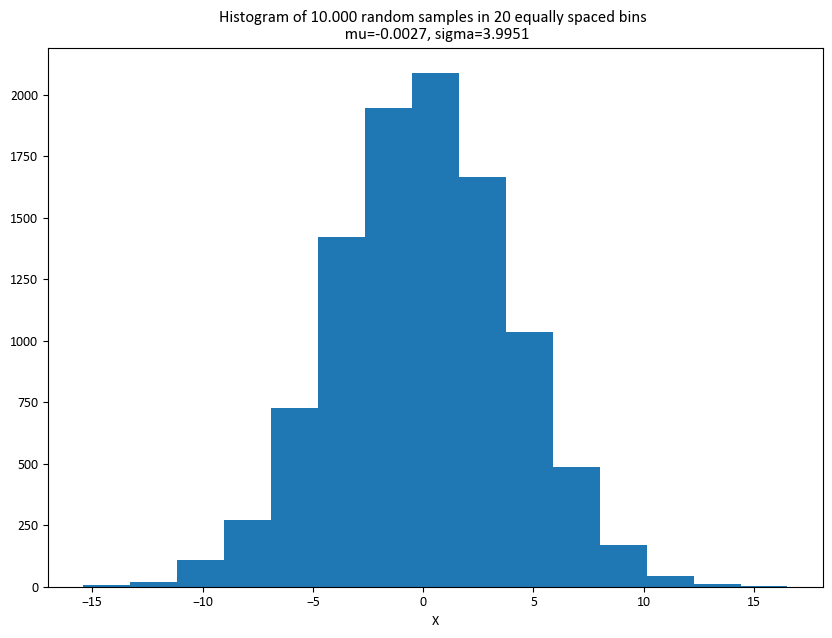

In [23]:
import numpy as np
#Setting seed to replicate results
np.random.seed(seed=96)
import matplotlib as mpl
import matplotlib.pyplot as plt

def setup_mpl():
    mpl.rcParams["font.family"] = "Calibri"
    mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

#Question 1-2
N = 10000
mu = 0
sigma = 4
X = mu + sigma * np.random.standard_normal(size=N)

fig, ax = plt.subplots(figsize =(10, 7))
bins = np.linspace(np.min(X),np.max(X),16)
ax.hist(X, bins = bins)
 
# Show plot
plt.title(f"Histogram of 10.000 random samples in 20 equally spaced bins \n mu={round(np.mean(X),4)}, sigma={round(np.std(X),4)}")
plt.xlabel("X")
plt.show()

Question 3-4: Compute cumulative average and standard deviation.

Question 5: 
Compute theoretical mean and median using Wikipedia as source for formulas.

Question 6: Create a figure.
* Plot the cumulative average computed in point 3. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
* Add errorbars to each point in the graph with width equal to the standard error of the mean (the one you computed in point 4).
* Add a horizontal line corresponding to the distribution mean (the one you found in point 5).

Sample mean is -0.0026824969249113137 
Theoretical mean is 0.

Sample median is -0.01658142094441005 
Theoretical median is 0.


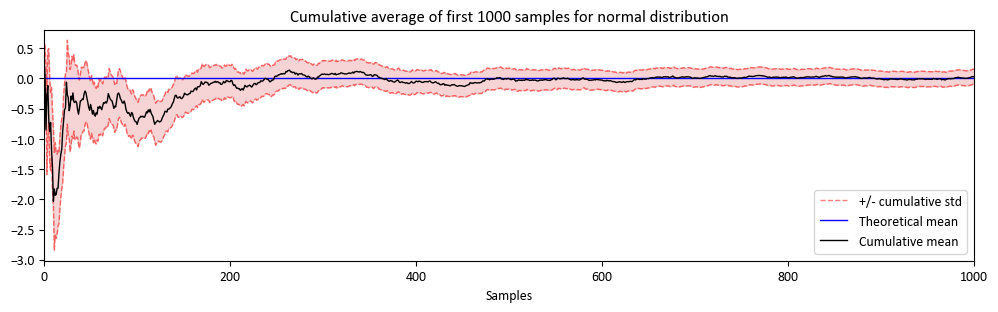

In [24]:
#Question 3-4
#Cumulative avg and std
cum_avg = [X[0]]+[np.mean(X[:x+1]) for x in range(1,len(X))]
cum_std = [X[0]] + [np.std(X[:i+1])/np.sqrt(i+1) for i in range(1,len(X))]

#Question 5
#mean 
sample_mean = np.sum(X)/len(X)
print(f"Sample mean is {sample_mean} \nTheoretical mean is 0.")

sort_X = np.sort(X)
print(f'\nSample median is {sort_X[int(len(X)/2)]} \nTheoretical median is 0.')

#Question 6
#array for x-axis
fig, ax = plt.subplots(figsize =(12, 3))
XX = np.arange(1,len(X)+1)

#plt.ylim(-1.8,1.8)
X_TOP =1000
plt.xlim(0,X_TOP)

#errorbars
UPPER = np.add(np.array(cum_avg),np.array(cum_std))
LOWER = np.array(cum_avg) - np.array(cum_std)
ax.fill_between(XX, UPPER, LOWER, alpha=0.2, color='tab:red')
plt.plot(XX,UPPER,"--",color="red",alpha=0.5,label=f"+/- cumulative std")
plt.plot(XX,LOWER,"--",color="red",alpha=0.5)

#horizontal line
plt.axhline(y = 0, color = 'blue', linestyle = '-',label=f"Theoretical mean")

#Rest of the plot
plt.plot(cum_avg,color="black",label="Cumulative mean")
plt.title(f"Cumulative average of first {X_TOP} samples for normal distribution")
plt.xlabel("Samples")
#plt.ylabel("Cumulative sum")
plt.legend()
plt.show()

## Question 7-8: Create a figure of cumulative median
* Plot the cumulative median computed in point 7. as a line plot (where the x-axis represent the size of the sample considered, and the y-axis is the average).
* Add a horizontal line corresponding to the distribution median (the one you found in point 5).
* Optional: Add errorbars to your median line graph, with width equal to the standard error of the median. You can compute the standard error of the median via bootstrapping.

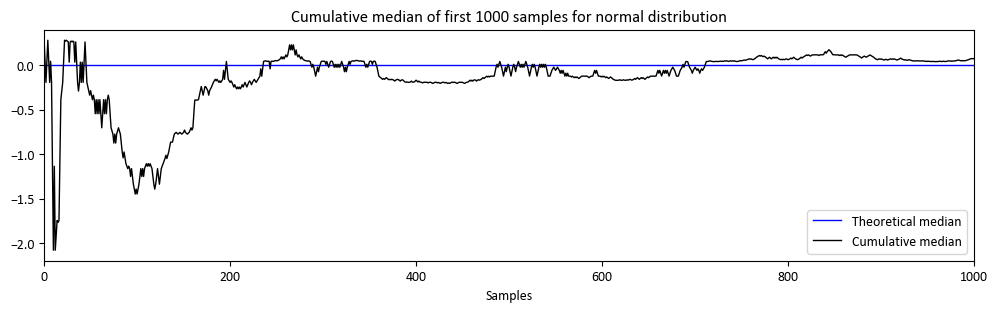

In [25]:
cum_med = [X[0]]+[np.median(X[:x+1]) for x in range(1,len(X))]

#Question 6
#array for x-axis
fig, ax = plt.subplots(figsize =(12, 3))
XX = np.arange(1,len(X)+1)

#plt.ylim(-1.8,1.8)
X_TOP =1000
plt.xlim(0,X_TOP)

#horizontal line
plt.axhline(y = 0, color = 'blue', linestyle = '-',label=f"Theoretical median")

#Rest of the plot
plt.plot(cum_med,color="black",label="Cumulative median")
plt.title(f"Cumulative median of first {X_TOP} samples for normal distribution")
plt.xlabel("Samples")
#plt.ylabel("Cumulative sum")
plt.legend()
plt.show()

## Pareto Distribution
Repeating same process for the pareto distribution

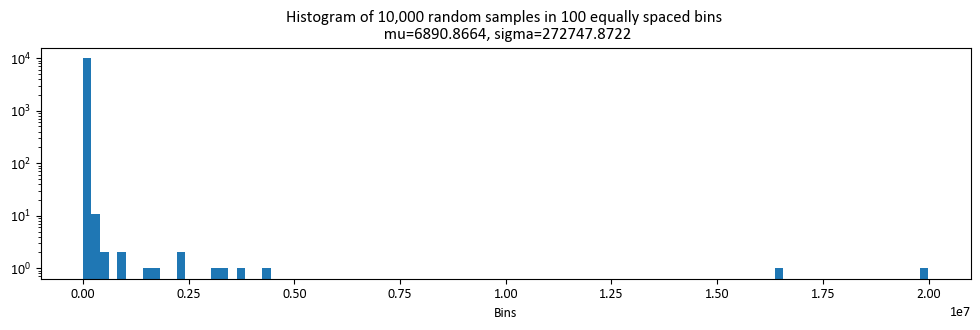

Sample mean is 6890.86635991935.
According to wikipedia theoretical mean is infinite for alpha <= 1

Sample median is 2.7612975403648106
Theoretical median is 4.0


In [26]:
##PARETO DIST

#Question 1-2
N = 10000
alpha = 0.5
x_m = 1

X = (np.random.pareto(alpha,size=N)) * x_m

#Histogram
fig, ax = plt.subplots(figsize =(12, 3))
N_bins = 100
bins = np.linspace(np.min(X),np.max(X),N_bins)
ax.hist(X, bins = bins)
 
# Show plot
plt.yscale("log")
plt.title(f"Histogram of 10,000 random samples in {N_bins} equally spaced bins \n mu={round(np.mean(X),4)}, sigma={round(np.std(X),4)}")
plt.xlabel("Bins")
plt.show()

#Question 3-4
cum_avg = [X[0]]+[np.mean(X[:x+1]) for x in range(1,len(X))]
cum_std = [X[0]] + [np.std(X[:i+1])/np.sqrt(i+1) for i in range(1,len(X))]

##Question 5##
#Average
sample_mean = np.sum(X)/len(X)

print(f"Sample mean is {sample_mean}.\nAccording to wikipedia theoretical mean is infinite for alpha <= 1")

#Median
sort_X = np.sort(X)
theoretical_median = 2 ** (1/alpha)
print(f'\nSample median is {sort_X[int(len(X)/2)]}\nTheoretical median is {theoretical_median}')

### Question 6: Cumulative average

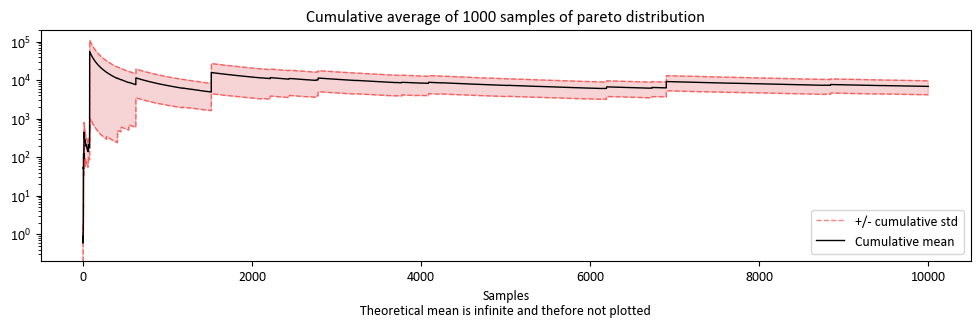

In [27]:
#Question 6
#array for x-axis
fig, ax = plt.subplots(figsize =(12, 3))
XX = np.arange(1,len(X)+1)

#errorbars
UPPER = np.add(np.array(cum_avg),np.array(cum_std))
LOWER = np.array(cum_avg) - np.array(cum_std)
ax.fill_between(XX, UPPER, LOWER, alpha=0.2, color='tab:red')
plt.plot(XX,UPPER,"--",color="red",alpha=0.5,label=f"+/- cumulative std")
plt.plot(XX,LOWER,"--",color="red",alpha=0.5)

#horizontal line
#plt.axhline(y = sample_mean, color = 'blue', linestyle = '-',label=f"Sample mean")

#Rest of the plot
plt.yscale("log")
plt.plot(cum_avg,color="black",label="Cumulative mean")
plt.title(f"Cumulative average of {X_TOP} samples of pareto distribution")
plt.xlabel("Samples\nTheoretical mean is infinite and thefore not plotted")
#plt.ylabel("Cumulative sum")
plt.legend()
plt.show()

### Question 7-8: Cumulative median

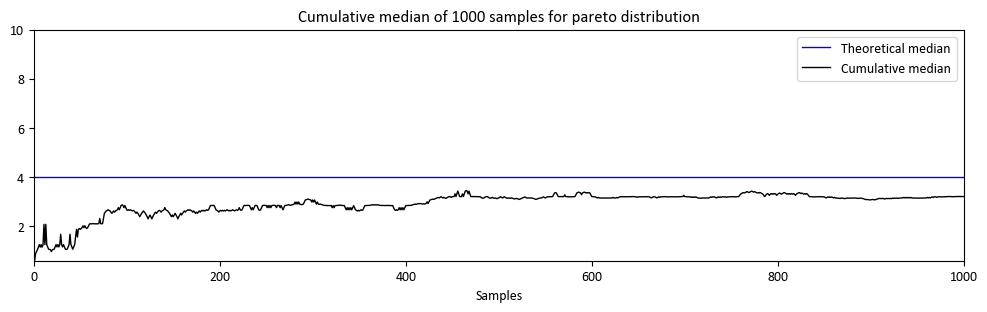

In [28]:
cum_med = [X[0]]+[np.median(X[:x+1]) for x in range(1,len(X))]

#Question 6
#array for x-axis
fig, ax = plt.subplots(figsize =(12, 3))
XX = np.arange(1,len(X)+1)

plt.ylim(min(cum_med),10)
X_TOP =1000
plt.xlim(0,X_TOP)

#horizontal line
plt.axhline(y = theoretical_median, color = 'blue', linestyle = '-',label=f"Theoretical median")

#Rest of the plot
plt.plot(cum_med,color="black",label="Cumulative median")
plt.title(f"Cumulative median of {X_TOP} samples for pareto distribution")
plt.xlabel("Samples")
#plt.ylabel("Cumulative sum")
plt.legend()
plt.show()

## Log Normal Distributon
It is assumed there is an error in the task description and np.random.standard_normal() is supposed to be np.random.lognormal. Repeating same process.

Sample mean is 1271.6037959450664 
Theoretical mean is 2980.9579870417283

sample median is 0.9937784930456299 
Theoretical median is 1.0


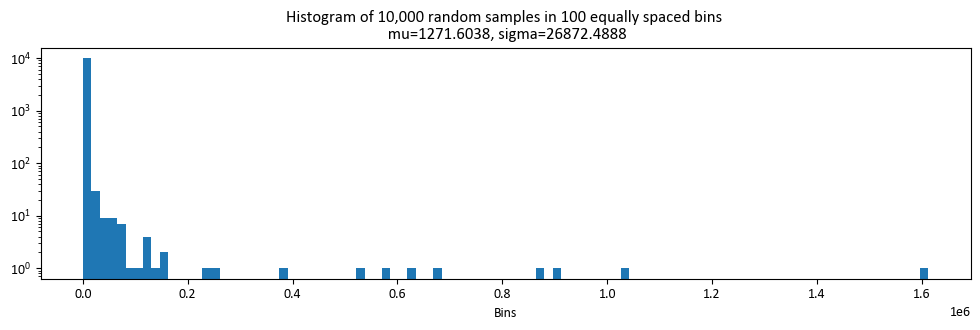

In [29]:
#Question 1-2
N,mu,sigma = 10000,0,4

X = np.random.lognormal(mu,sigma,N)

#Question 3-4
cum_avg = [X[0]]+[np.mean(X[:x+1]) for x in range(1,len(X))]
cum_std = [X[0]] + [np.std(X[:i+1])/np.sqrt(i+1) for i in range(1,len(X))]

fig, ax = plt.subplots(figsize =(12, 3))


##Question 5
#mean 
sample_mean = np.sum(X)/len(X)
theoretical_mean = np.exp(mu + sigma ** 2/2)
print(f"Sample mean is {sample_mean} \nTheoretical mean is {theoretical_mean}")

sort_X = np.sort(X)
theoretical_median = np.exp(mu)
print(f'\nsample median is {sort_X[int(len(X)/2)]} \nTheoretical median is {theoretical_median}')

#Histogram
N_bins = 100
bins = np.linspace(np.min(X),np.max(X),N_bins)
ax.hist(X, bins = bins)
 
# Show plot
plt.yscale("log")
plt.title(f"Histogram of 10,000 random samples in {N_bins} equally spaced bins \n mu={round(np.mean(X),4)}, sigma={round(np.std(X),4)}")
plt.xlabel("Bins")
plt.show()

### Cumulative average

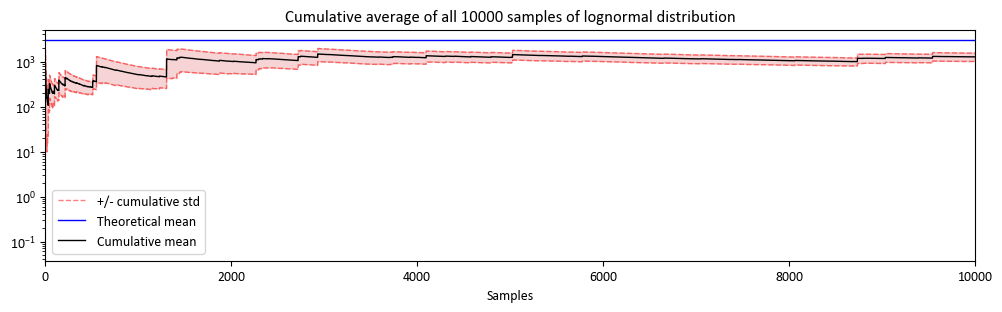

In [30]:
#array for x-axis
fig, ax = plt.subplots(figsize =(12, 3))
XX = np.arange(1,len(X)+1)

#errorbars
UPPER = np.add(np.array(cum_avg),np.array(cum_std))
LOWER = np.array(cum_avg) - np.array(cum_std)
ax.fill_between(XX, UPPER, LOWER, alpha=0.2, color='tab:red')
plt.plot(XX,UPPER,"--",color="red",alpha=0.5,label=f"+/- cumulative std")
plt.plot(XX,LOWER,"--",color="red",alpha=0.5)

X_TOP =N
plt.xlim(0,X_TOP)

#horizontal line
plt.axhline(y = theoretical_mean, color = 'blue', linestyle = '-',label=f"Theoretical mean")

#Rest of the plot
plt.yscale("log")
plt.plot(cum_avg,color="black",label="Cumulative mean")
plt.title(f"Cumulative average of all {X_TOP} samples of lognormal distribution")
plt.xlabel("Samples")
#plt.ylabel("Cumulative sum")
plt.legend()
plt.show()

### Cumulative median

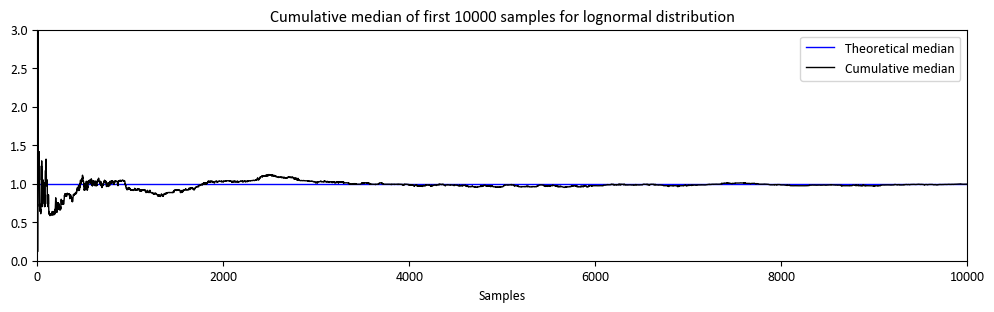

In [31]:
#Calculating cumulating median
cum_med = [X[0]]+[np.median(X[:x+1]) for x in range(1,len(X))]
#array for x-axis
fig, ax = plt.subplots(figsize =(12, 3))
XX = np.arange(1,len(X)+1)

#horizontal line
plt.axhline(y = theoretical_median, color = 'blue', linestyle = '-',label=f"Theoretical median")

#Rest of the plot
plt.ylim(min(cum_med),10)
X_TOP =N
plt.xlim(0,X_TOP)
plt.ylim(0,3)
plt.plot(cum_med,color="black",label="Cumulative median")
plt.title(f"Cumulative median of first {X_TOP} samples for lognormal distribution")
plt.xlabel("Samples")
#plt.ylabel("Cumulative sum")
plt.legend()
plt.show()

## Question 13: Papers
Now, consider the array collecting the citations of papers from 2009 you created in Week3, Exercise 2, point 1. First, compute the mean and median number of citations for this population. Then, extract a random sample of N=10,000 papers.

First off, it is assumed this is meant to be 2019 and not 2009. Albeit, to be honest my patience and energy is running low regarding API requests at this point, so I will resort to consider the paper dataframe of 1694 entries created previosly in the assignment. I will sample 20% of the dataframe (339) and repeat the same process of the distributions.

Amount of randomly sampled papers 1312
Sample mean is 50.766006097560975

Sample median is 6


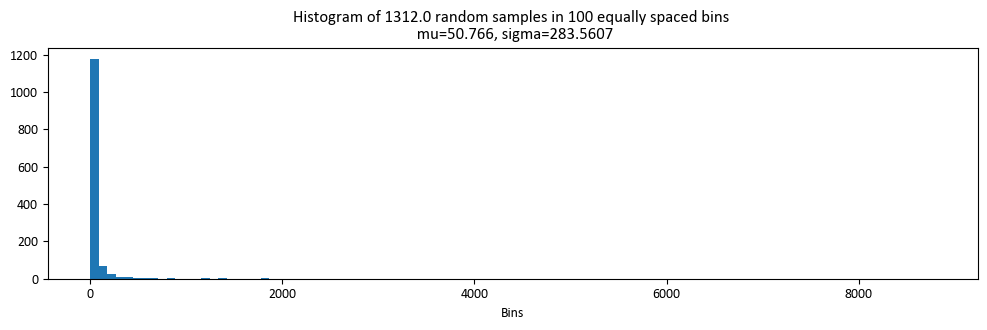

In [32]:
#Question 1-2
NR = round(len(df_Papers)*0.2,0)
X = random.sample(df_Papers["Citation Count"].to_list(), int(NR))

print(f"Amount of randomly sampled papers {len(X)}")
#Question 3-4
cum_avg = [X[0]]+[np.mean(X[:x+1]) for x in range(1,len(X))]
cum_std = [X[0]] + [np.std(X[:i+1])/np.sqrt(i+1) for i in range(1,len(X))]

fig, ax = plt.subplots(figsize =(12, 3))


##Question 5
#average
sample_mean = np.sum(X)/len(X)
print(f"Sample mean is {sample_mean}")

#Median
sort_X = np.sort(X)
sample_median = sort_X[int(len(X)/2)]
print(f'\nSample median is {sort_X[int(len(X)/2)]}')

#Histogram
N_bins = 100
bins = np.linspace(np.min(X),np.max(X),N_bins)
ax.hist(X, bins = bins)
 
# Show plot
#plt.yscale("log")
plt.title(f"Histogram of {NR} random samples in {N_bins} equally spaced bins \n mu={round(np.mean(X),4)}, sigma={round(np.std(X),4)}")
plt.xlabel("Bins")
plt.show()

### Cumulative average

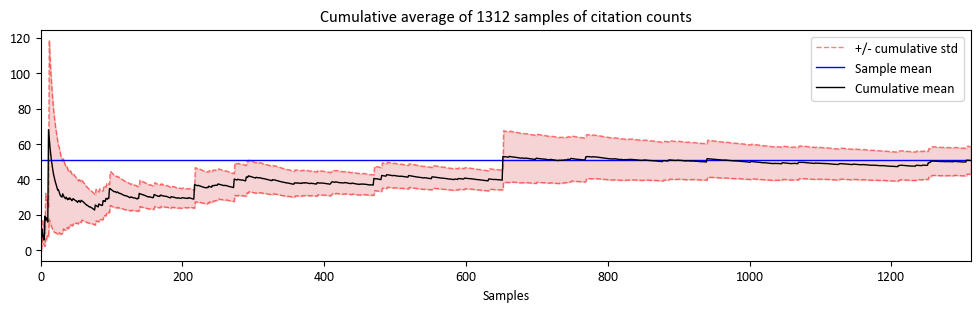

In [42]:
#array for x-axis
fig, ax = plt.subplots(figsize =(12, 3))
XX = np.arange(1,len(X)+1)

#errorbars
UPPER = np.add(np.array(cum_avg),np.array(cum_std))
LOWER = np.array(cum_avg) - np.array(cum_std)
ax.fill_between(XX, UPPER, LOWER, alpha=0.2, color='tab:red')
plt.plot(XX,UPPER,"--",color="red",alpha=0.5,label=f"+/- cumulative std")
plt.plot(XX,LOWER,"--",color="red",alpha=0.5)

X_TOP =NR
plt.xlim(0,X_TOP)

#horizontal line
plt.axhline(y = sample_mean, color = 'blue', linestyle = '-',label=f"Sample mean")

#Rest of the plot
#plt.yscale("log")
plt.plot(cum_avg,color="black",label="Cumulative mean")
plt.title(f"Cumulative average of {int(X_TOP)} samples of citation counts")
plt.xlabel("Samples")
#plt.ylabel("Cumulative sum")
plt.legend()
plt.show()

### Cumulative median

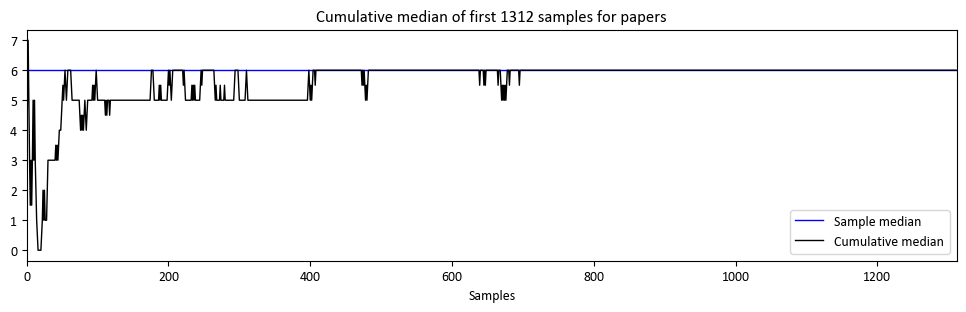

In [33]:
#Calculating cumulating median
cum_med = [X[0]]+[np.median(X[:x+1]) for x in range(1,len(X))]
#array for x-axis
fig, ax = plt.subplots(figsize =(12, 3))
XX = np.arange(1,len(X)+1)

#horizontal line
plt.axhline(y = sample_median, color = 'blue', linestyle = '-',label=f"Sample median")

#Rest of the plot
X_TOP =NR
plt.xlim(0,X_TOP)
plt.plot(cum_med,color="black",label="Cumulative median")
plt.title(f"Cumulative median of first {int(X_TOP)} samples for papers")
plt.xlabel("Samples")
#plt.ylabel("Cumulative sum")
plt.legend()
plt.show()

# Questions about distributions
###### Compare the evolution of the cumulative average for the Gaussian, Pareto and LogNormal distribution. What do you observe? Would you expect these results? Why?

The normal distribution is seen converge towards the mean after a few hundred samples, and overall never strays far from it. Considering the properties of the normal distribution being symmetrical around the mean and thus points will be equally likely to take the same absolute value on each side of the mean. The pareto distributions on the other hand has the property of most samples taking small values while few will take extreme values. A slow and steady decline of the cumulative average is observed is caused by the many, low values that are disrupted by a sudden spike when the few, extreme values are sampled and cumulated. Likewise behaviour is observed of the lognormal but not on the same volatile nature pointing towards lognormal having fewer values far from the mean as opposed to the apparently infinite mean of the parete distribution.

###### Compare the cumulative median vs the cumulative average for the three distributions. What do you observe? Can you draw any conclusions regarding which statistics (the mean or the median) is more usfeul in the different cases?

First of all, I am basing my answer to the question of the single, plotted sample which is prone the sampling error/bias. The normal distribution was only plotted for the first 1000 samples to better illustrate the behaviour at the beginning, but at these points the mean is seen to converge towards the theoretical mean quicker and likely to be a better metric for normal distributed data. For the pareto distribution shape parameter alpha is less than 1 resulting in an theoretical infinite mean, rendering any estimate of the mean a futile undertaking as the mean would be likely to switch erratically depending on the sample. Once more the lognormal is a less extreme case of pareto, and purely judging by the values of the, it is seen that the median follows its theoretical counterpart much better than the mean and the theoretical mean.  


###### Consider the plots you made using the citation count data in point 14. What do you observe? What are the implications What do you think are the main take-home message of this exercise?

Based on the many iterations prior to implementing seeds, I suspect this particular sample is slightly out the ordinaire as the median is deadset on the theoretical median. One thing to note in general for citations is the phenomenon of the rich gets richer. Certain points of the cumulative mean are seen to spike, especially evidencted at approximately 650 samples, where the mean increases from high 30's to the low 50's. Citation will foster citations as once the paper has been cited once it is more likely to be cited by other authors due to increased exposure.